<a href="https://colab.research.google.com/github/VijayPrakashReddy-k/EVA/blob/master/S13/YoloV3%20customdata/YOLOv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [4]:
ls

gdrive/  sample_data/  YoloV3/


In [5]:
cd ~

/root


In [6]:
cd /content/gdrive/My Drive/EVA/S13/YoloV3/

/content/gdrive/My Drive/EVA/S13/YoloV3


In [7]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave

Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-26 14:48:03.214112: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 610.87it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 84.00it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 5

In [10]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-26 14:59:08.880039: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (43 found, 0 missing, 2 empty, 0 duplicate, for 45 images): 100% 45/45 [00:00<00:00, 684.02it/s]
Caching images (0.0GB): 100% 45/45 [00:43<00:00,  1.03it/s]
Reading image shapes: 100% 45/45 [00:00<00:00, 686.57it/s]
Caching labels (43 found, 0 missing,

In [12]:
!python detect.py --conf-thres 0.5 --output train_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.5, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='train_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/46 data/customdata/images/car_1.jpg: 320x512 Done. (0.021s)
image 2/46 data/customdata/images/car_10.jpg: 320x512 1 Lighting Mcqueens, Done. (0.020s)
image 3/46 data/customdata/images/car_11.jpg: 512x384 1 Lighting Mcqueens, Done. (0.022s)
image 4/46 data/customdata/images/car_12.jpg: 384x512 1 Lighting Mcqueens, Done. (0.023s)
image 5/46 data/customdata/images/car_13.jpg: 320x512 1 Lighting Mcqueens, Done. (0.025s)
image 6/46 data/customdata/images/car_16.jpg: 512x448 1 Lighting Mcqueens, Done. (0.0

**Visualise the Inferred Images:**

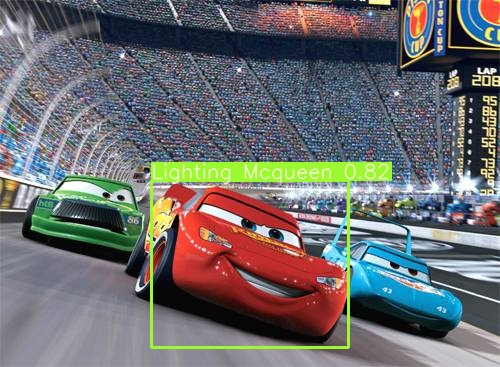

In [15]:
Image(filename='train_out/car_40.jpg', width=300)

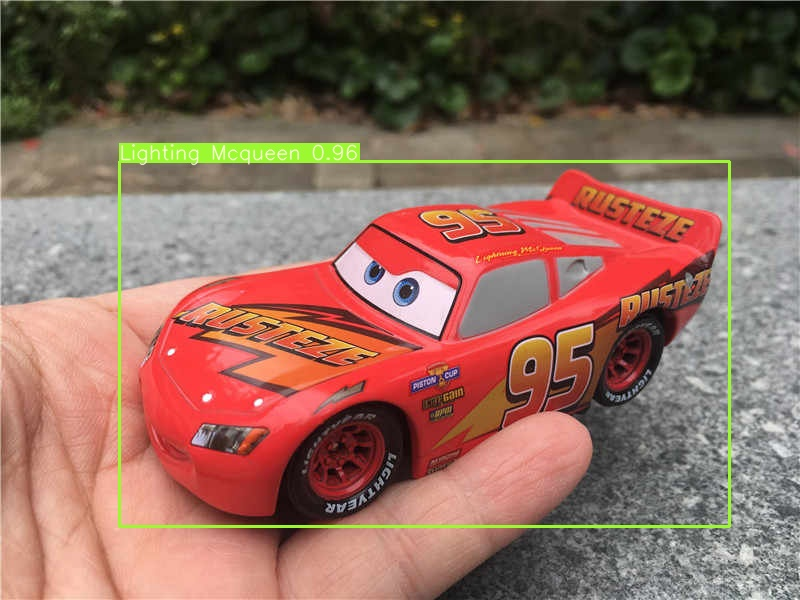

In [18]:
Image(filename='train_out/car_45.jpg', width=400)

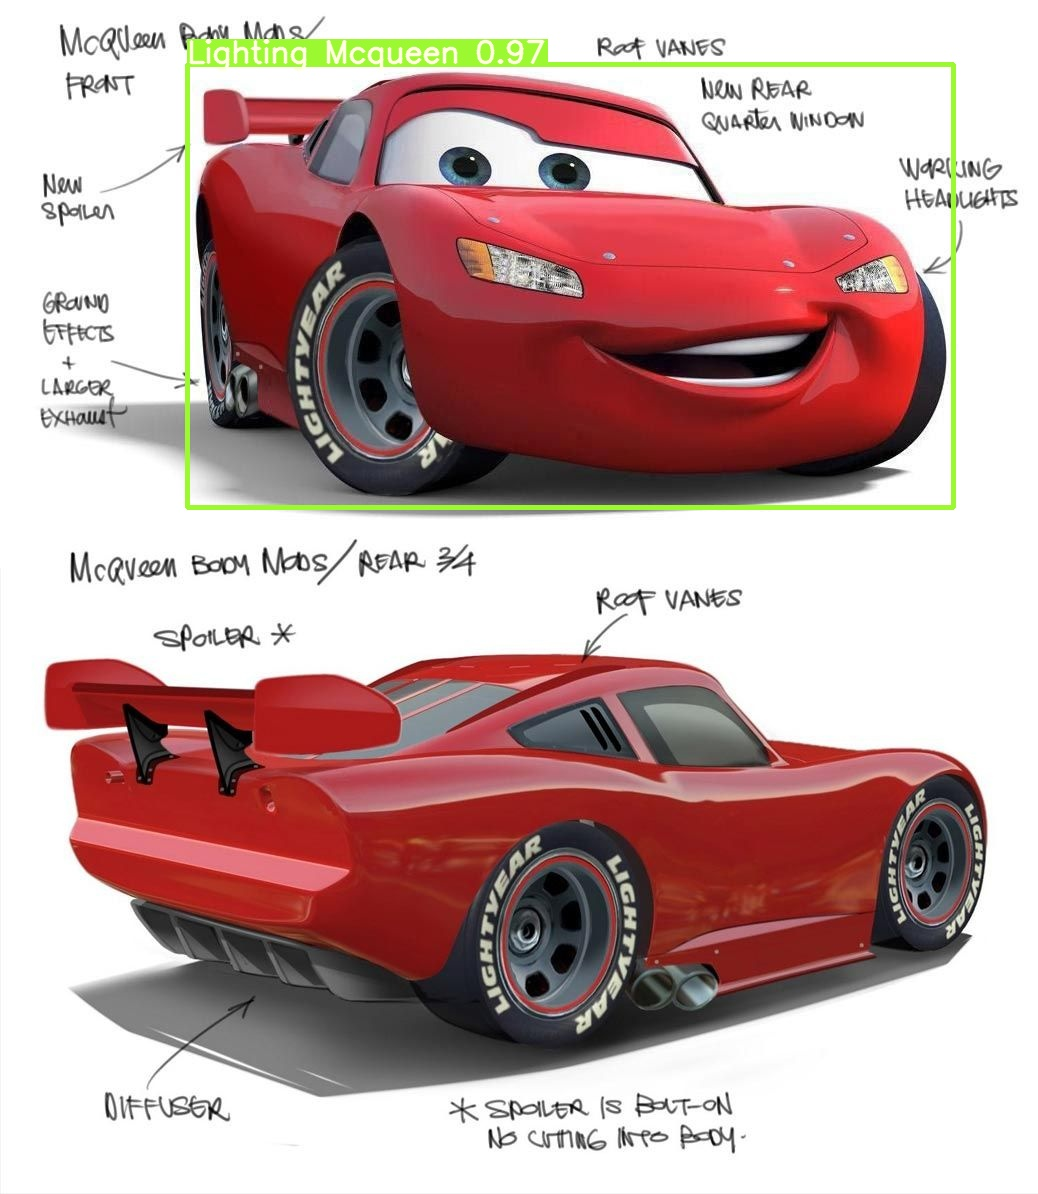

In [24]:
Image(filename='train_out/car_18.jpg', width=500)

Performing Light(n)ing McQueen object-detection on the video file dowloaded from youtube (https://www.youtube.com/watch?v=2LeOH9AGJQM)

In [29]:
!python detect.py --conf-thres 0.4 --output "Detected_Mcqueen/" --source "cars.mp4"

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.4, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='Detected_Mcqueen/', save_txt=False, source='cars.mp4', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
video 1/1 (1/1126) cars.mp4: 256x512 Done. (0.019s)
video 1/1 (2/1126) cars.mp4: 256x512 Done. (0.021s)
video 1/1 (3/1126) cars.mp4: 256x512 2 Lighting Mcqueens, Done. (0.020s)
video 1/1 (4/1126) cars.mp4: 256x512 2 Lighting Mcqueens, Done. (0.021s)
video 1/1 (5/1126) cars.mp4: 256x512 1 Lighting Mcqueens, Done. (0.020s)
video 1/1 (6/1126) cars.mp4: 256x512 1 Lighting Mcqueens, Done. (0.017s)
video 1/1 (7/1126) cars.mp4: 256x512 1 Lighting Mcqueens, Done. (0.017s)
video 1/1 (8/1126) cars.mp4: 256x512 2 Lighting Mc